In [ ]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
matplotlib.rcParams['figure.figsize']=(5,5)

Documentation

1. finding missing values in the dataset

2. some values of diameter was missing.so removed those rows from dataset

3. Some of the parameters were missing most of the values(more than 90%) so removing those parameters as they will not be providing sufficient information about the diameter.

4. Changing the datatype of diameter from Object to Float.

5. Plotting graphs to understant the distribution of data points.

In [ ]:
asteroid=pd.read_csv("/content/drive/MyDrive/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
asteroid.shape

(839714, 31)

In [ ]:
asteroid.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
print("columns in asteroid",list(asteroid.columns))

columns in asteroid ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


info regarding columns


*   name=Name of asteroid
*   a= semi major axis
*   e-eccentricity
*   i- inclination with respect to x-y elliptical plane
*   om - longitude of the ascending node
*   w- argument of perihelion
*   q - perihelion distance
*   ad - aphelion distance
*   per_y - orbital period
*   data_Arc - data arc span(d)
*   condition_Code = orbit condition code
*   n_obs_used - number of observation used
*   H - absolute magnitude parameter
*   neo-Near earth object
*   pha - Physically hazardous object
*   diameter - diameter of asteroids
*   extent - Object bi/tri axial ellipsoid dimensions(Km)
*   albedo - geometric albedo
*   rot_per - rotation period



In [ ]:
#finding missing values in dataset
asteroid.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [ ]:
#looking at missing values of diameter
asteroid[asteroid['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [ ]:
#removing those columns which have missing values of diameter
asteroid=asteroid.dropna(subset=['diameter'])

In [ ]:
asteroid.shape

(137636, 31)

In [ ]:
asteroid.isnull().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [ ]:
#removing those variable which have a lot of missing values
asteroid=asteroid.drop('name',axis=1)
asteroid=asteroid.drop('extent',axis=1)
asteroid=asteroid.drop('GM',axis=1)
asteroid=asteroid.drop('BV',axis=1)
asteroid=asteroid.drop('UB',axis=1)
asteroid=asteroid.drop('IR',axis=1)
asteroid=asteroid.drop('spec_B',axis=1)
asteroid=asteroid.drop('spec_T',axis=1)
asteroid=asteroid.drop('G',axis=1)
asteroid=asteroid.drop('rot_per',axis=1)

In [ ]:
asteroid.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [ ]:
asteroid['diameter']=asteroid['diameter'].astype(float)
asteroid['a']=asteroid['a'].astype(float)

In [ ]:
#finding corelation of different variables with Diameter 
coef, p = spearmanr(asteroid['a'], asteroid['diameter'])
print(coef)

0.5701489865858509


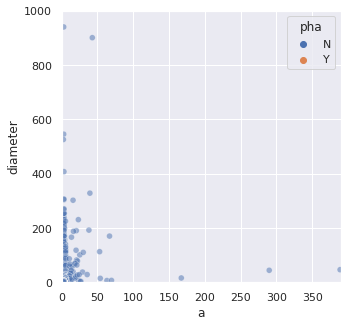

In [ ]:
sns.scatterplot(data=asteroid,x='a',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,390])
plt.ylim([0,1000])
plt.show();

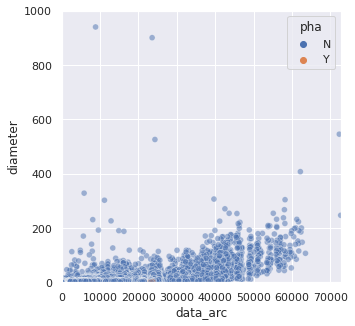

In [ ]:
sns.scatterplot(data=asteroid,x='data_arc',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,72684])
plt.ylim([0,1000])
plt.show();

In [ ]:
max(asteroid['albedo'])

1.0

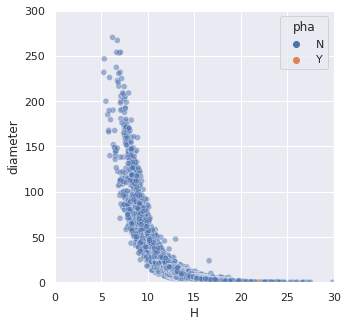

In [ ]:
sns.scatterplot(data=asteroid,x='H',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,30])
plt.ylim([0,300])
plt.show();

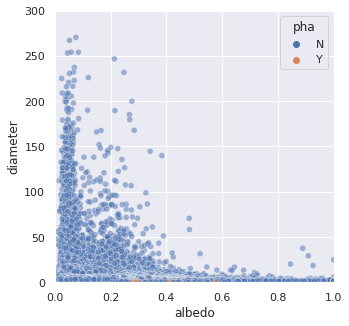

In [ ]:
sns.scatterplot(data=asteroid,x='albedo',y='diameter',hue='pha',alpha=0.5)
plt.xlim([0,1])
plt.ylim([0,300])
plt.show();

In [ ]:
asteroid.isnull().sum()

a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           138
condition_code       0
n_obs_used           0
H                  747
neo                  0
pha                  0
diameter             0
albedo            1230
moid                 0
class                0
n                    0
per                  0
ma                   0
dtype: int64

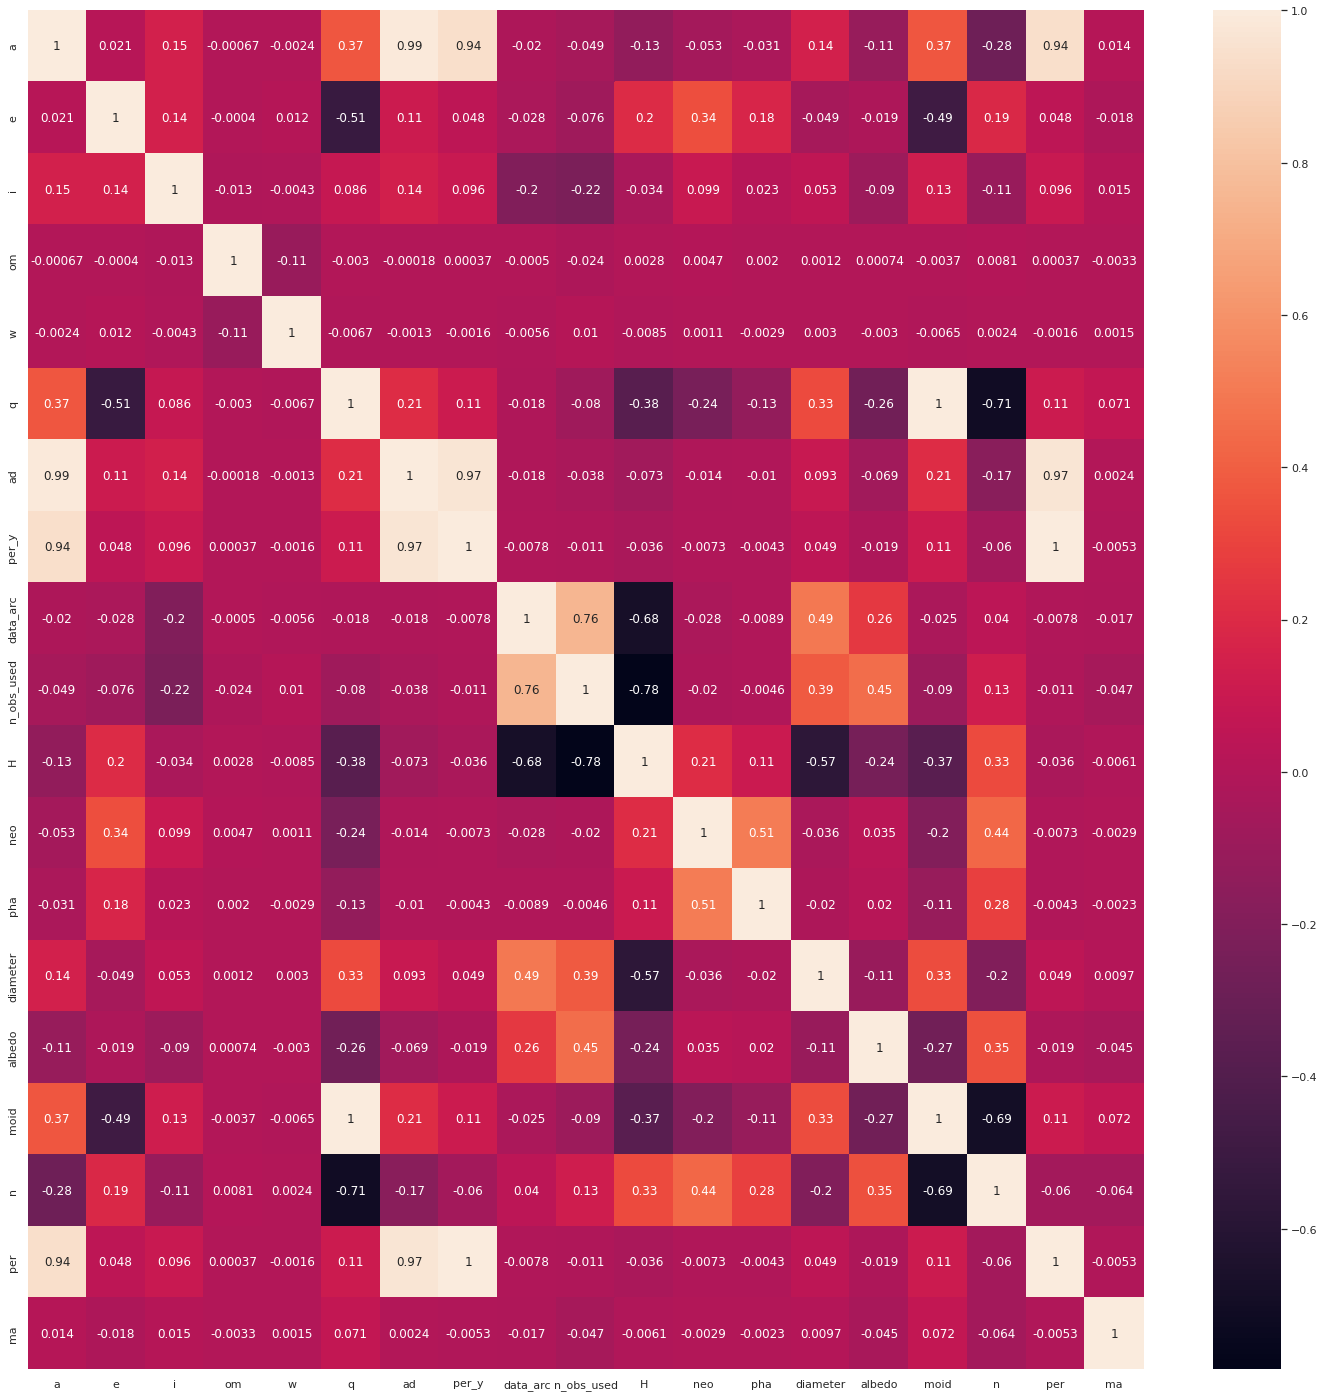

In [ ]:
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(asteroid.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

data_arc=i,n_obs_used,H,diameter,albedo,data_arc (6)
H=e,q,data_arc,n_obs_used,diameter,albedo,moid,n  (8)
albedo=a,q,data_arc,n_obs_used,H,diameter,moid,n  (8)

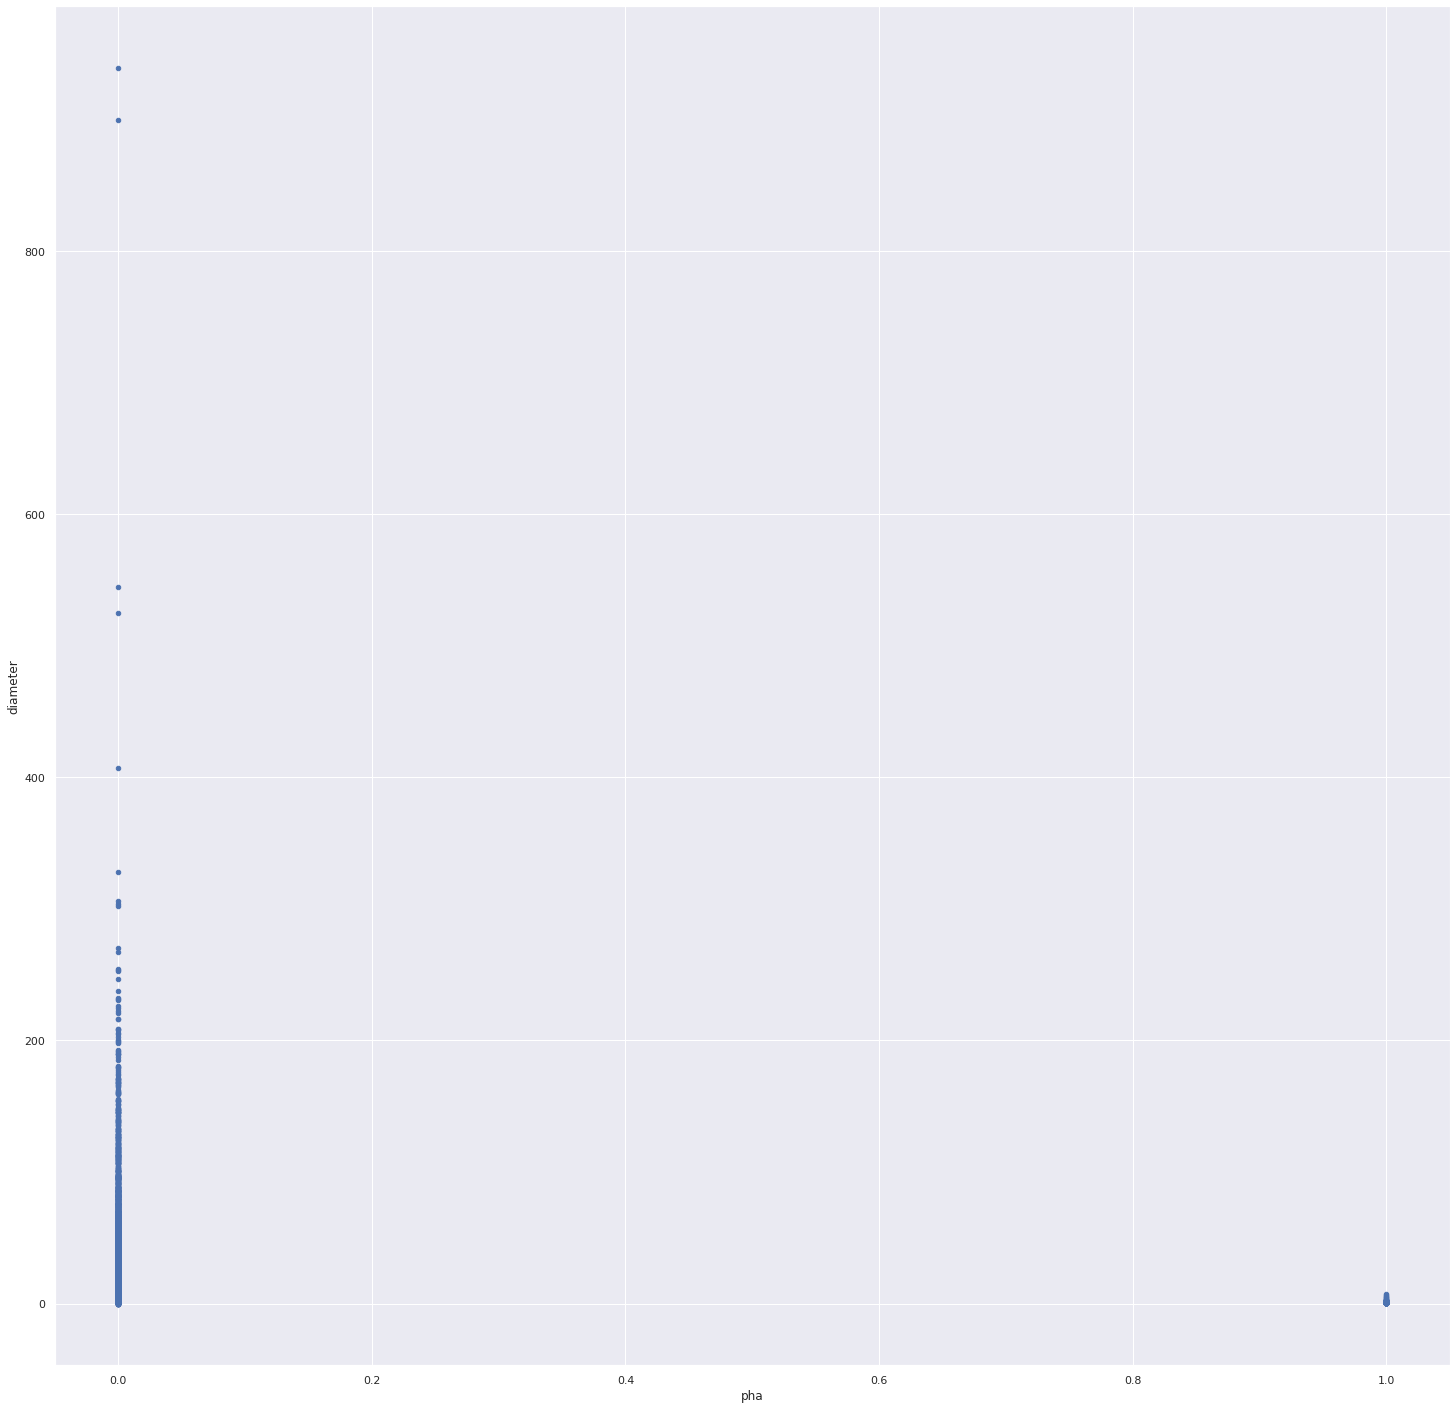

In [ ]:
asteroid.plot(x='pha',y='diameter',kind = 'scatter')
plt.show()

In [ ]:
asteroid["neo"]=asteroid["neo"].replace({'Y':1,'N':0})
asteroid["pha"]=asteroid["pha"].replace({'Y':1,'N':0})


In [ ]:
y=asteroid['diameter']
x=asteroid.drop(['diameter'],axis=1)

In [ ]:
y.head()

0    939.400
1    545.000
2    246.596
3    525.400
4    106.699
Name: diameter, dtype: float64

In [ ]:
x.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,0,0,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,0,0,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,0,0,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,0,0,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,0,0,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
x.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                 int64
pha                 int64
albedo            float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

In [ ]:
#checking duplicate values in the dataset
x.duplicated().sum()

0